[强化学习1 - 多臂老虎机问题](https://zhuanlan.zhihu.com/p/664400524?utm_id=0)

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
class Bandit:
    def __init__(self, arms=10):
        self.probs = np.random.rand(arms)
    
    def play(self, arm):
        prob = self.probs[arm]
        if prob > np.random.rand():
            return 1
        else:
            return 0

In [7]:
bandit = Bandit()

for i in range(10):
    res = bandit.play(i)
    print(f'{i}: {res}')

0: 1
1: 1
2: 1
3: 1
4: 1
5: 1
6: 1
7: 1
8: 0
9: 1


In [8]:
class Agent:
    def __init__(self, epsilon, action_size=10):
        self.epsilon = epsilon
        self.Qs = np.zeros(action_size) # 记录每个拉杆的期望估计值
        self.ns = np.zeros(action_size) # 记录每个拉杆被选择的次数
    
    def update(self, action, reward):
        self.ns[action] += 1 # 更新次数
        self.Qs[action] += (reward - self.Qs[action]) / self.ns[action] # 更新期望估计, 由公式2计算

    def get_action(self):
        if self.epsilon > np.random.rand():
            return np.random.randint(0, len(self.Qs)) # 以epsilon的概率进行探索，随机选择拉杆
        return np.argmax(self.Qs) # 以 1 - epsilon的概率进行利用，选择目前期望估计值最大的拉杆

In [11]:
def play():
    steps = 1000
    epsilon = 0.1
    np.random.seed(123456)

    bandit = Bandit()
    agent = Agent(epsilon)
    total_reward = 0
    total_rewards = []
    rates = []

    for step in range(steps):
        action = agent.get_action()
        reward = bandit.play(action)
        agent.update(action, reward)

        total_reward += reward
        total_rewards.append(total_reward)
        rates.append(total_reward / (step + 1)) # rate表示到目前为止，每一步平均获取的奖励值

    print(total_reward)

    plt.ylabel("Total reward")
    plt.xlabel("Steps")
    plt.plot(total_rewards)
    plt.show()

    plt.ylabel("Rates")
    plt.xlabel("Steps")
    plt.plot(rates)
    plt.show()

911


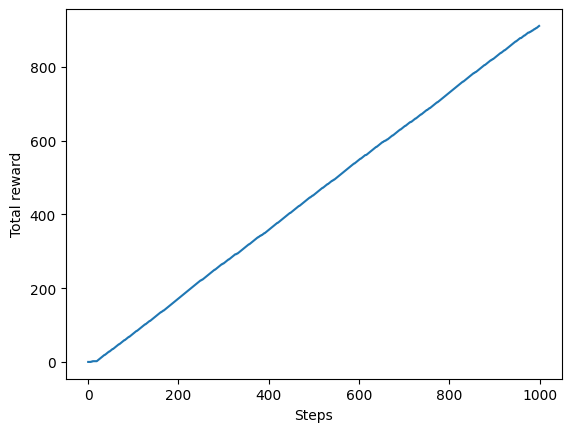

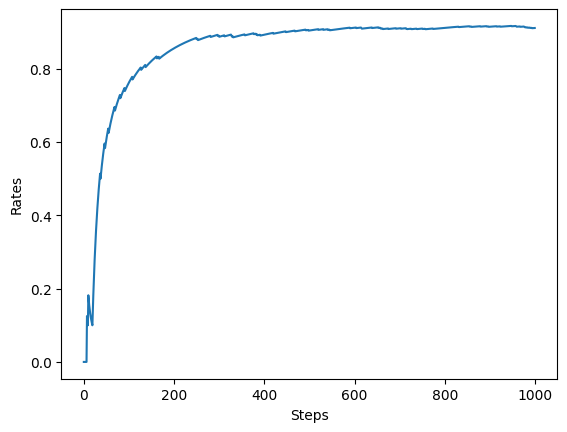

In [12]:
play()

In [13]:
def play():
    steps = 1000
    epsilon = 0
    np.random.seed(123456)

    bandit = Bandit()
    agent = Agent(epsilon)
    total_reward = 0
    total_rewards = []
    rates = []

    for step in range(steps):
        action = agent.get_action()
        reward = bandit.play(action)
        agent.update(action, reward)

        total_reward += reward
        total_rewards.append(total_reward)
        rates.append(total_reward / (step + 1)) # rate表示到目前为止，每一步平均获取的奖励值

    print(total_reward)

    plt.ylabel("Total reward")
    plt.xlabel("Steps")
    plt.plot(total_rewards)
    plt.show()

    plt.ylabel("Rates")
    plt.xlabel("Steps")
    plt.plot(rates)
    plt.show()

120


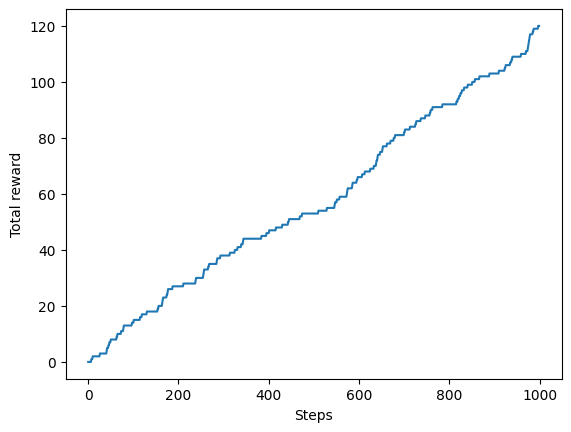

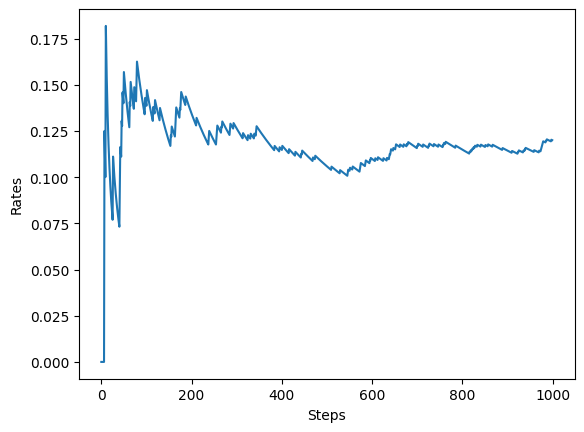

In [14]:
# epsilon = 0
play()

In [15]:
class NonStatBandit:
    def __init__(self, arms=10):
        self.arms = arms
        self.probs = np.random.rand(arms)
    
    def play(self, arm):
        prob = self.probs[arm]
        self.probs += 0.1 * np.random.randn(self.arms)
        if prob > np.random.rand():
            return 1
        else:
            return 0

In [19]:
class NonStatBandit:
    def __init__(self, arms=10):
        self.arms = arms
        self.probs = np.random.rand(arms)
    
    def play(self, arm):
        prob = self.probs[arm]
        self.probs += 0.1 * np.random.randn(self.arms)
        if prob > np.random.rand():
            return 1
        else:
            return 0
        
class AlphaAgent:
    def __init__(self, epsilon, alpha, actions=10):
        self.epsilon = epsilon
        self.alpha = alpha
        self.Qs = np.zeros(actions)
    
    def update(self, action, reward):
        self.Qs[action] += (reward - self.Qs[action]) * self.alpha # 根据公式(3)计算
    
    def get_action(self):
        if self.epsilon > np.random.rand():
            return np.random.randint(0, len(self.Qs))
        return np.argmax(self.Qs)

In [22]:
def play2():
    steps = 1000
    epsilon = 0.1
    alpha = 0.5
    np.random.seed(123456)

    bandit = NonStatBandit()
    agent = AlphaAgent(epsilon, alpha)
    total_reward = 0
    total_rewards = []
    rates = []

    for step in range(steps):
        action = agent.get_action()
        reward = bandit.play(action)
        agent.update(action, reward)

        total_reward += reward
        total_rewards.append(total_reward)
        rates.append(total_reward / (step + 1)) # rate表示到目前为止，每一步平均获取的奖励值

    print(total_reward)

    plt.ylabel("Total reward")
    plt.xlabel("Steps")
    plt.plot(total_rewards)
    plt.show()

    plt.ylabel("Rates")
    plt.xlabel("Steps")
    plt.plot(rates)
    plt.show()

947


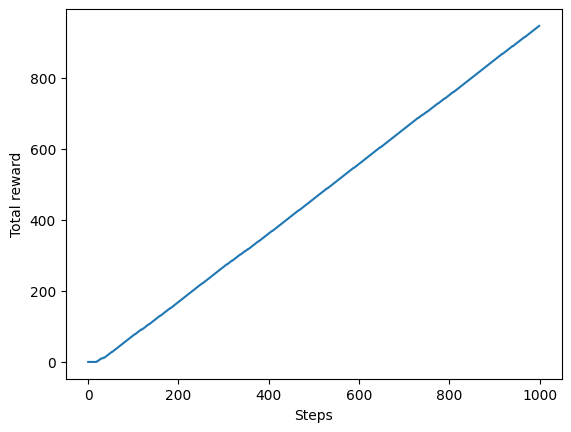

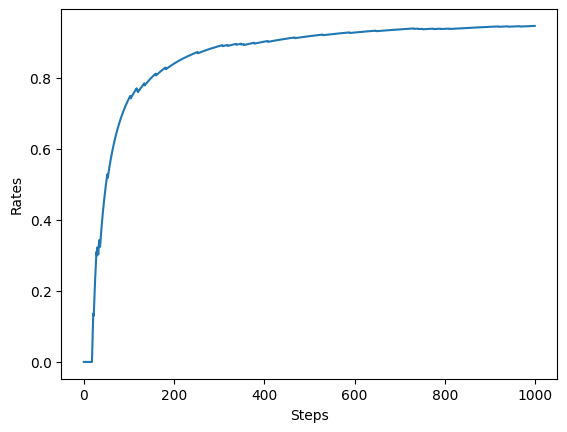

In [23]:
play2()